In [15]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [16]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [17]:
# !wget --no-check-certificate \
#     https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv \
#     -O /tmp/daily-min-temperatures.csv

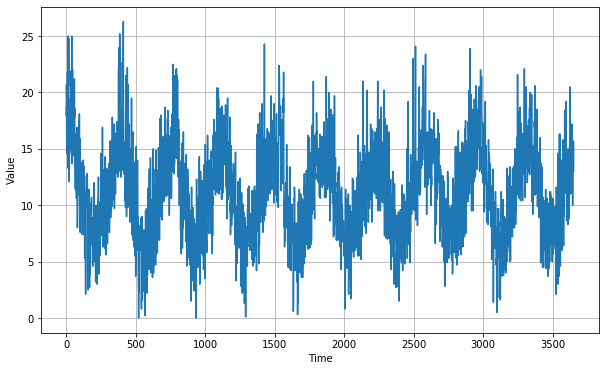

In [18]:
import csv
time_step = []
temps = []

with open('/tmp/daily_min_temperatures/daily-min-temperatures.csv') as csvfile:
    reader=csv.reader(csvfile)
    next(reader)
    for row in reader:
        temps.append(float(row[1]))
time_step = list(range(1, len(temps)+1))
# YOUR CODE HERE. READ TEMPERATURES INTO TEMPS
# HAVE TIME STEPS BE A SIMPLE ARRAY OF 1, 2, 3, 4 etc

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

In [19]:
split_time = 2500
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000



In [20]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [21]:
train_dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_dataset = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [8]:
def model_forecast(model, series, window_size):
    # YOUR CODE HERE

SyntaxError: unexpected EOF while parsing (<ipython-input-8-e32e00c9f823>, line 2)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Lambda
from tensorflow.keras.optimizers import Adam, SGD

In [23]:
model = Sequential([
    Lambda(lambda x:tf.expand_dims(x, -1)),
    Bidirectional(LSTM(64, input_length=window_size, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [24]:
model.compile(loss='mae', optimizer="adam", metrics=['mae', 'mse'])

In [25]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [26]:
lrs=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-8 * 10 ** (epoch//20))

In [27]:
checkpoint=tf.keras.callbacks.ModelCheckpoint("E:/tmp/daily_min_temperatures/best", save_best_only=True)

In [28]:
history=model.fit(train_dataset, epochs=100, validation_data=valid_dataset, callbacks=[lrs])

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

78/78 [==============================] - 3s 44ms/step - loss: 11.5010 - mae: 11.5010 - mse: 148.7967 - val_loss: 12.3392 - val_mae: 12.3392 - val_mse: 168.2449 - lr: 1.0000e-08
Epoch 2/100
78/78 [==============================] - 1s 12ms/step - loss: 11.5005 - mae: 11.5005 - mse: 148.7836 - val_loss: 12.3387 - val_mae: 12.3387 - val_mse: 168.2309 - lr: 1.0000e-08
Epoch 3/100
78/78 [==============================] - 1s 12ms/step - loss: 11.4999 - mae: 11.4999 - mse: 148.7706 - val_loss: 12.33

78/78 [==============================] - 1s 12ms/step - loss: 11.3777 - mae: 11.3777 - mse: 145.9512 - val_loss: 12.2119 - val_mae: 12.2119 - val_mse: 165.0995 - lr: 1.0000e-07
Epoch 41/100
78/78 [==============================] - 1s 12ms/step - loss: 11.3469 - mae: 11.3469 - mse: 145.2493 - val_loss: 12.1539 - val_mae: 12.1539 - val_mse: 163.6689 - lr: 1.0000e-06
Epoch 42/100
78/78 [==============================] - 1s 12ms/step - loss: 11.2896 - mae: 11.2896 - mse: 143.9310 - val_loss: 12.0948 - val_mae: 12.0948 - val_mse: 162.2137 - lr: 1.0000e-06
Epoch 43/100
78/78 [==============================] - 1s 12ms/step - loss: 11.2311 - mae: 11.2311 - mse: 142.5836 - val_loss: 12.0343 - val_mae: 12.0343 - val_mse: 160.7266 - lr: 1.0000e-06
Epoch 44/100
78/78 [==============================] - 1s 12ms/step - loss: 11.1710 - mae: 11.1710 - mse: 141.2099 - val_loss: 11.9722 - val_mae: 11.9722 - val_mse: 159.2132 - lr: 1.0000e-06
Epoch 45/100
78/78 [==============================] - 1s 12ms/s

Epoch 84/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1997 - mae: 2.1997 - mse: 7.9823 - val_loss: 2.0156 - val_mae: 2.0156 - val_mse: 6.8305 - lr: 1.0000e-04
Epoch 85/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1808 - mae: 2.1808 - mse: 7.7881 - val_loss: 2.0135 - val_mae: 2.0135 - val_mse: 6.7753 - lr: 1.0000e-04
Epoch 86/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1656 - mae: 2.1656 - mse: 7.6569 - val_loss: 1.9822 - val_mae: 1.9822 - val_mse: 6.6056 - lr: 1.0000e-04
Epoch 87/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1304 - mae: 2.1304 - mse: 7.4617 - val_loss: 1.9711 - val_mae: 1.9711 - val_mse: 6.4813 - lr: 1.0000e-04
Epoch 88/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1498 - mae: 2.1498 - mse: 7.5867 - val_loss: 1.9976 - val_mae: 1.9976 - val_mse: 6.6806 - lr: 1.0000e-04
Epoch 89/100
78/78 [==============================] - 1s 12ms/step - loss: 2.1179 - mae: 2

In [29]:
model.compile(loss='mae', optimizer=Adam(lr=1e-5, clipvalue=1.0), metrics=['mae', 'mse'])

In [30]:
history=model.fit(train_dataset, epochs=300, validation_data=valid_dataset)

Epoch 1/300
78/78 [==============================] - 2s 23ms/step - loss: 1.9852 - mae: 1.9852 - mse: 6.5089 - val_loss: 1.8476 - val_mae: 1.8476 - val_mse: 5.6996
Epoch 2/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9825 - mae: 1.9825 - mse: 6.4944 - val_loss: 1.8510 - val_mae: 1.8510 - val_mse: 5.7204
Epoch 3/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9814 - mae: 1.9814 - mse: 6.4837 - val_loss: 1.8543 - val_mae: 1.8543 - val_mse: 5.7395
Epoch 4/300
78/78 [==============================] - 1s 13ms/step - loss: 1.9807 - mae: 1.9807 - mse: 6.4698 - val_loss: 1.8446 - val_mae: 1.8446 - val_mse: 5.6796
Epoch 5/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9783 - mae: 1.9783 - mse: 6.4615 - val_loss: 1.8507 - val_mae: 1.8507 - val_mse: 5.7146
Epoch 6/300
78/78 [==============================] - 1s 13ms/step - loss: 1.9766 - mae: 1.9766 - mse: 6.4471 - val_loss: 1.8433 - val_mae: 1.8433 - val_mse: 5.6655
Epoch 7/300
78/7

Epoch 51/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9489 - mae: 1.9489 - mse: 6.2950 - val_loss: 1.8226 - val_mae: 1.8226 - val_mse: 5.5249
Epoch 52/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9479 - mae: 1.9479 - mse: 6.2819 - val_loss: 1.8223 - val_mae: 1.8223 - val_mse: 5.5285
Epoch 53/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9467 - mae: 1.9467 - mse: 6.2769 - val_loss: 1.8214 - val_mae: 1.8214 - val_mse: 5.5207
Epoch 54/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9466 - mae: 1.9466 - mse: 6.2735 - val_loss: 1.8218 - val_mae: 1.8218 - val_mse: 5.5251
Epoch 55/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9468 - mae: 1.9468 - mse: 6.2779 - val_loss: 1.8252 - val_mae: 1.8252 - val_mse: 5.5375
Epoch 56/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9452 - mae: 1.9452 - mse: 6.2719 - val_loss: 1.8215 - val_mae: 1.8215 - val_mse: 5.5193
Epoch 57/3

Epoch 101/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9307 - mae: 1.9307 - mse: 6.1836 - val_loss: 1.8076 - val_mae: 1.8076 - val_mse: 5.4231
Epoch 102/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9282 - mae: 1.9282 - mse: 6.1613 - val_loss: 1.8095 - val_mae: 1.8095 - val_mse: 5.4293
Epoch 103/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9285 - mae: 1.9285 - mse: 6.1674 - val_loss: 1.8051 - val_mae: 1.8051 - val_mse: 5.4083
Epoch 104/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9271 - mae: 1.9271 - mse: 6.1598 - val_loss: 1.8076 - val_mae: 1.8076 - val_mse: 5.4213
Epoch 105/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9308 - mae: 1.9308 - mse: 6.1754 - val_loss: 1.8066 - val_mae: 1.8066 - val_mse: 5.4159
Epoch 106/300
78/78 [==============================] - 1s 13ms/step - loss: 1.9273 - mae: 1.9273 - mse: 6.1647 - val_loss: 1.8075 - val_mae: 1.8075 - val_mse: 5.4145
Epoc

78/78 [==============================] - 1s 12ms/step - loss: 1.9174 - mae: 1.9174 - mse: 6.1049 - val_loss: 1.8042 - val_mae: 1.8042 - val_mse: 5.3724
Epoch 151/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9146 - mae: 1.9146 - mse: 6.0905 - val_loss: 1.7987 - val_mae: 1.7987 - val_mse: 5.3496
Epoch 152/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9141 - mae: 1.9141 - mse: 6.0854 - val_loss: 1.7981 - val_mae: 1.7981 - val_mse: 5.3379
Epoch 153/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9174 - mae: 1.9174 - mse: 6.1038 - val_loss: 1.7978 - val_mae: 1.7978 - val_mse: 5.3388
Epoch 154/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9146 - mae: 1.9146 - mse: 6.0956 - val_loss: 1.8101 - val_mae: 1.8101 - val_mse: 5.3965
Epoch 155/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9162 - mae: 1.9162 - mse: 6.0995 - val_loss: 1.7990 - val_mae: 1.7990 - val_mse: 5.3487
Epoch 156/300
78/7

78/78 [==============================] - 1s 12ms/step - loss: 1.9104 - mae: 1.9104 - mse: 6.0743 - val_loss: 1.7954 - val_mae: 1.7954 - val_mse: 5.3068
Epoch 200/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9075 - mae: 1.9075 - mse: 6.0499 - val_loss: 1.7973 - val_mae: 1.7973 - val_mse: 5.3190
Epoch 201/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9091 - mae: 1.9091 - mse: 6.0530 - val_loss: 1.7971 - val_mae: 1.7971 - val_mse: 5.3216
Epoch 202/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9073 - mae: 1.9073 - mse: 6.0521 - val_loss: 1.8036 - val_mae: 1.8036 - val_mse: 5.3435
Epoch 203/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9073 - mae: 1.9073 - mse: 6.0484 - val_loss: 1.7957 - val_mae: 1.7957 - val_mse: 5.3086
Epoch 204/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9104 - mae: 1.9104 - mse: 6.0707 - val_loss: 1.7947 - val_mae: 1.7947 - val_mse: 5.3058
Epoch 205/300
78/7

78/78 [==============================] - 1s 13ms/step - loss: 1.9035 - mae: 1.9035 - mse: 6.0300 - val_loss: 1.7992 - val_mae: 1.7992 - val_mse: 5.3148
Epoch 249/300
78/78 [==============================] - 1s 13ms/step - loss: 1.9031 - mae: 1.9031 - mse: 6.0214 - val_loss: 1.7925 - val_mae: 1.7925 - val_mse: 5.2830
Epoch 250/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9030 - mae: 1.9030 - mse: 6.0322 - val_loss: 1.7953 - val_mae: 1.7953 - val_mse: 5.2914
Epoch 251/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9030 - mae: 1.9030 - mse: 6.0235 - val_loss: 1.7933 - val_mae: 1.7933 - val_mse: 5.2895
Epoch 252/300
78/78 [==============================] - 1s 11ms/step - loss: 1.9026 - mae: 1.9026 - mse: 6.0230 - val_loss: 1.8014 - val_mae: 1.8014 - val_mse: 5.3189
Epoch 253/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9033 - mae: 1.9033 - mse: 6.0298 - val_loss: 1.7947 - val_mae: 1.7947 - val_mse: 5.2934
Epoch 254/300
78/7

78/78 [==============================] - 1s 12ms/step - loss: 1.9013 - mae: 1.9013 - mse: 6.0230 - val_loss: 1.7929 - val_mae: 1.7929 - val_mse: 5.2806
Epoch 298/300
78/78 [==============================] - 1s 11ms/step - loss: 1.8991 - mae: 1.8991 - mse: 6.0198 - val_loss: 1.7951 - val_mae: 1.7951 - val_mse: 5.2898
Epoch 299/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9008 - mae: 1.9008 - mse: 6.0173 - val_loss: 1.8031 - val_mae: 1.8031 - val_mse: 5.3265
Epoch 300/300
78/78 [==============================] - 1s 12ms/step - loss: 1.9019 - mae: 1.9019 - mse: 6.0205 - val_loss: 1.7942 - val_mae: 1.7942 - val_mse: 5.2850
